The objective of the exercise is to implement computational graphs in TensorFlow to train and use such an architecture. The constraints we put ourselves is to use **low-level** functions of TensorFlow, i.e. we will not use high-level functions to compose layers and to train the parameters.

In [2]:
#######################
# Dataset Preparation #
#######################
import numpy as np
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train_vec),(x_test, y_test_vec) = mnist.load_data()
x_train, x_test = (x_train / 255.0) - 0.5, (x_test / 255.0) - 0.5
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convert class vectors to binary class matrices
n_classes = 10
y_train = tf.keras.utils.to_categorical(y_train_vec, n_classes)
y_test = tf.keras.utils.to_categorical(y_test_vec, n_classes)

In [3]:
# Function to sample a random batch from dataset
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = data[idx]
    labels_shuffle = labels[idx]

    return data_shuffle, labels_shuffle

In [45]:
##################
# Training phase #
##################
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as pl

E = 50               # number of epochs
B = 128               # batch size
N = x_train.shape[0]  # number of samples
D = x_train.shape[1]  # dimension of input sample
H = 300               # number of neurons
A = 0.01              # learning rate alpha

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

# Build the computational graph

# define placeholders x, y and learning rate alpha

x = tf.placeholder(tf.float32, shape=(B,D))
y = tf.placeholder(tf.float32, shape=(B,n_classes))
alpha =  tf.placeholder(tf.float32)
# define TensorFlow Variables for w1, b1, w2, b2 following the given examples
w1 = tf.Variable(tf.truncated_normal((D, H), stddev = 0.1))
b1 = tf.Variable(tf.constant(0.0, shape=[H]))
w2 = tf.Variable(tf.truncated_normal((H, n_classes), stddev = 0.1))
b2 = tf.Variable(tf.constant(0.0, shape=[n_classes]))

# define nodes for forward computation for hidden neurons h and output neurons y_pred
logits1 = tf.matmul(x,w1)+b1
h = tf.maximum(logits1,0)
logits2 = tf.matmul(h,w2)+b2
y_pred = tf.nn.sigmoid(logits2)
# define nodes for difference between predicted and target values and for loss
diff = y_pred-y
loss = tf.reduce_mean(tf.reduce_sum(diff**2,axis=1))
# define the gradients
grad_w1, grad_b1, grad_w2, grad_b2 = tf.gradients(loss, [w1,b1,w2,b2])

# compute the new values of the gradients with the Variable assign method (see slides)
new_w1 = w1.assign(w1 - alpha*grad_w1)
new_b1 =  b1.assign(b1 - alpha*grad_b1)
new_w2 =  w2.assign(w2 - alpha*grad_w2)
new_b2 =  b2.assign(b2 - alpha*grad_b2)
updates = tf.group(new_w1, new_b1, new_w2, new_b2)

# Run the computational graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    J = [] # to store the evolution of loss J for each epoch
    for epoch in range(E):
        J_epoch = 0.0
        for _ in range(int(N/B)): # number of batches to visit for 1 epoch
            # get batches calling the next_batch method provided above
            x_train_batch, y_train_batch =  next_batch(B, x_train, y_train)
            # define a dictionary of values that will be used to feed the placeholders of the graph
            values = {x:x_train_batch, y:y_train_batch, alpha:A}
            # ask TensorFlow to compute the graph on the batch and update the values
            loss_val = sess.run([loss, updates], feed_dict=values)
            J_epoch += loss_val[0]
        J.append(J_epoch)
        print("epoch", epoch, J_epoch)
        
    # now retrieve the weights and bias out of the computational graph
    w1_trained, b1_trained, w2_trained, b2_trained = sess.run([w1, b1, w2, b2])

epoch 0 334.4510900378227
epoch 1 201.84214106202126
epoch 2 160.38648733496666
epoch 3 140.53829512000084
epoch 4 127.73839563131332
epoch 5 118.84905652701855
epoch 6 114.33962121605873
epoch 7 109.28817753493786
epoch 8 106.05130569636822
epoch 9 101.98022834956646
epoch 10 99.80125810205936
epoch 11 96.30609944462776
epoch 12 95.73136411607265
epoch 13 93.7672469317913
epoch 14 91.20954333990812
epoch 15 89.8358032554388
epoch 16 87.40891425311565
epoch 17 87.54454374313354
epoch 18 84.94009237736464
epoch 19 83.09115305542946
epoch 20 83.86275394260883
epoch 21 81.80183826386929
epoch 22 80.04427422583103
epoch 23 80.2789182588458
epoch 24 79.71688033640385
epoch 25 77.76254963129759
epoch 26 76.89278835058212
epoch 27 76.22847481817007
epoch 28 75.22253842651844
epoch 29 74.29127226024866
epoch 30 74.37664056569338
epoch 31 72.62959356606007
epoch 32 71.62242640554905
epoch 33 71.62051520496607
epoch 34 71.20090151578188
epoch 35 70.00528293848038
epoch 36 69.01402267068624
epoch

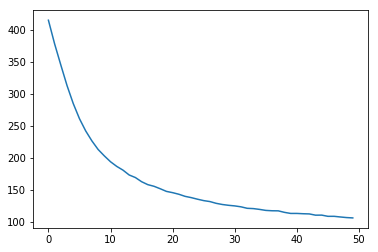

In [42]:
# Plot the evolution of the loss
pl.plot(J)

In [43]:
#################
# Testing phase #
#################

N = x_test.shape[0]  # number of samples
D = x_test.shape[1]  # dimension of input sample

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################
# Build the computational graph
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, n_classes))
w1 = tf.placeholder(tf.float32, shape=(D,H))
b1 = tf.placeholder(tf.float32, shape=[H])
w2 = tf.placeholder(tf.float32, shape=(H,n_classes))
b2 = tf.placeholder(tf.float32, shape=[n_classes])

# define nodes for forward computation for hidden neurons h and output neurons y_pred
logits1 = tf.matmul(x,w1)+b1
h = tf.maximum(logits1,0)
logits2 = tf.matmul(h,w2)+b2
y_pred = tf.nn.sigmoid(logits2)

# Run the computational graph
with tf.Session() as sess:
    # define a dictionary of values that will be used to feed the placeholders of the graph
    # don't forget to pass in the trained weights and biases
    # ask TensorFlow to compute the graph on the test set
    values = {x:x_test, y:y_test, w1:w1_trained, b1:b1_trained, w2:w2_trained, b2:b2_trained}
    y_pred_test = sess.run([y_pred], feed_dict=values)[0]

# At this stage, y_pred_test should contain the matrix of outputs on the test set with shape (N_test, 10)

In [44]:
# compute accuracy
y_winner = np.argmax(y_pred_test, axis=1)
N_test = y_winner.size
num_correct = (y_winner == y_test_vec).sum()
num_missed = N_test - num_correct
accuracy = num_correct * 1.0 / N_test
error_rate = num_missed * 1.0 / N_test
print('# correct  : ', num_correct)
print('# missed   : ', num_missed)
print('accuracy   :  %2.2f %%'% (accuracy*100.0))
print('error rate :  %2.2f %%'% (error_rate*100.0))

# correct  :  8816
# missed   :  1184
accuracy   :  88.16 %
error rate :  11.84 %
